In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [30]:
dataset = pd.read_csv("../input/sonar.all-data.csv")

In [31]:
dataset.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,0.236376,0.250666,0.273544,0.297689,0.321429,0.379217,0.416495,0.453055,0.504797,0.563449,0.609209,0.624841,0.648010,0.673223,0.675444,0.700148,0.702115,0.693473,0.641895,0.581871,0.506281,0.439903,0.416761,0.401535,0.390343,0.382597,0.362331,0.338353,0.324986,0.311385,0.290403,0.278269,0.246368,0.213053,0.196909,0.160738,0.122537,0.091217,0.051995,0.020366,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,0.132923,0.140264,0.141262,0.164075,0.205158,0.232975,0.264213,0.261947,0.258614,0.263225,0.258434,0.256373,0.250335,0.239555,0.245520,0.237768,0.246252,0.237631,0.240818,0.220864,0.212917,0.213389,0.206907,0.230499,0.257756,0.262755,0.239546,0.212655,0.199210,0.179076,0.170717,0.169137,0.139308,0.132795,0.151924,0.134254,0.087155,0.062496,0.036029,0.013673,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,0.128200,0.133450,0.165750,0.176100,0.166500,0.195900,0.205500,0.241950,0.299050,0.350450,0.397550,0.406350,0.455250,0.540450,0.524800,0.543550,0.529800,0.533950,0.461300,0.414250,0.349300,0.284100,0.257350,0.217550,0.178550,0.154000,0.160000,0.174250,0.172450,0.185900,0.164100,0.158700,0.155200,0.126850,0.094450,0.068400,0.064200,0.044950,0.026300,0.011500,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,0.225100,0.249700,0.265500,0.281900,0.284000,0.307500,0.306800,0.370900,0.434800,0.543000,0.627500,0.667000,0.700700,0.701200,0.722100,0.754500,0.753900,0.731700,0.682500,0.607400,0.490600,0.430300,0.390300,0.349700,0.310800,0.319500,0.303900,0.310400,0.282900,0.279000,0.260500,0.244400,0.221100,0.177600,0.147300,0.121100,0.101500,0.077700,0.044900,0.017900,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,0.301800,0.331600,0.351500,0.386950,0.453050,0.536050,0.660050,0.679100,0.731900,0.809450,0.818050

In [32]:
dataset.shape

(207, 61)

In [33]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1:]

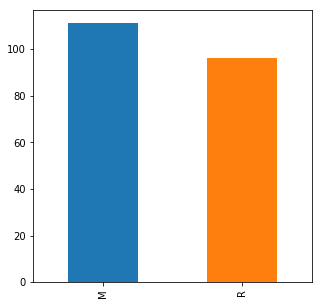

In [34]:
dataset["R"].value_counts().sort_index().plot.bar(figsize=(5,5))

In [35]:
# one hot encoding
y = pd.get_dummies(y)

In [36]:
y.head()

,R_M,R_R
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [37]:
X, y = shuffle(X,y, random_state=1)

In [38]:
print (X.head())
print (y.head())

     0.0200  0.0371  0.0428  0.0207   ...    0.0180  0.0084  0.0090  0.0032
186  0.0368  0.0279  0.0103  0.0566   ...    0.0009  0.0086  0.0110  0.0052
155  0.0047  0.0059  0.0080  0.0554   ...    0.0060  0.0045  0.0002  0.0029
165  0.0411  0.0277  0.0604  0.0525   ...    0.0108  0.0050  0.0085  0.0044
200  0.0335  0.0258  0.0398  0.0570   ...    0.0045  0.0022  0.0005  0.0031
58   0.0125  0.0152  0.0218  0.0175   ...    0.0017  0.0041  0.0086  0.0058

[5 rows x 60 columns]
     R_M  R_R
186    1    0
155    1    0
165    1    0
200    1    0
58     0    1


In [39]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=415)

In [40]:
learning_rate = 0.3
trainning_epochs = 1000  # epoch means number of iteration
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]

In [41]:
# we have only two classes
# 1. Mine
# 2. Rock
# model_path store the location where we save the model

n_class = 2
model_path = "../working"

In [42]:
# hidden layers
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

In [43]:
x = tf.placeholder(tf.float32, [None, n_dim])
w = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros(n_class))
y_ = tf.placeholder(tf.float32, [None, n_class])

In [44]:
# defining the weights and biases for each layer

weights = {
    "h1" : tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    "h2" : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    "h3" : tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    "h4" : tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    "out" : tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

biases = {
    "b1" :  tf.Variable(tf.truncated_normal([n_hidden_1])),
    "b2" :  tf.Variable(tf.truncated_normal([n_hidden_2])),
    "b3" :  tf.Variable(tf.truncated_normal([n_hidden_3])),
    "b4" :  tf.Variable(tf.truncated_normal([n_hidden_4])),
    "out" :  tf.Variable(tf.truncated_normal([n_class]))
}

In [45]:
# defining Multilayer Perceptron
def multilayer_perceptron(x, weights, biases):
    
    # hidden layer with "relu" activation
    layer_1 = tf.add(tf.matmul(x, weights["h1"]), biases["b1"])
    layer_1 = tf.nn.relu(layer_1)
    
    # hidden layer with "sigmoid" activation
    layer_2 = tf.add(tf.matmul(layer_1, weights["h2"]), biases["b2"])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    # hidden layer with "sigmoid" activation
    layer_3 = tf.add(tf.matmul(layer_2, weights["h3"]), biases["b3"])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    # hidden layer with "relu" activation
    layer_4 = tf.add(tf.matmul(layer_3, weights["h4"]), biases["b4"])
    layer_4 = tf.nn.relu(layer_4)
    
    out_layer = tf.matmul(layer_4, weights["out"]) + biases["out"]
    
    return out_layer

In [46]:
# initialize all the variables
init = tf.global_variables_initializer()

In [47]:
saver = tf.train.Saver()

In [48]:
y = multilayer_perceptron(x, weights, biases)

In [49]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y , labels = y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [50]:
sess = tf.Session()
sess.run(init)

In [51]:
mse_history = []
accuracy_history = []

In [52]:
for epoch in range(trainning_epochs):
    sess.run(training_step, feed_dict= {x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict = {x: train_x, y_:train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # print("Accuracy: ", (sess.run(accuracy, feed_dict = {x: X_test, y_: y_test})))
    pred_y = sess.run(y, feed_dict={x : test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict = {x : train_x, y_: train_y}))
    accuracy_history.append(accuracy)
    
    print ("epoch: ", epoch, "- cost: ", cost, "- MSE: ", mse_, "- Training Accuracy: ", accuracy)

epoch:  0 - cost:  108.862076 - MSE:  14476.853 - Training Accuracy:  0.54545456
epoch:  1 - cost:  12.962966 - MSE:  158.93463 - Training Accuracy:  0.45454547
epoch:  2 - cost:  12.276263 - MSE:  198.85457 - Training Accuracy:  0.54545456
epoch:  3 - cost:  1.8604214 - MSE:  4.0162544 - Training Accuracy:  0.45454547
epoch:  4 - cost:  0.8285492 - MSE:  1.4791625 - Training Accuracy:  0.54545456
epoch:  5 - cost:  0.71068835 - MSE:  0.85091853 - Training Accuracy:  0.54545456
epoch:  6 - cost:  0.67693174 - MSE:  0.6904501 - Training Accuracy:  0.53939396
epoch:  7 - cost:  0.6593854 - MSE:  0.597039 - Training Accuracy:  0.55151516
epoch:  8 - cost:  0.65483 - MSE:  0.5877782 - Training Accuracy:  0.6484848
epoch:  9 - cost:  0.65042466 - MSE:  0.5900891 - Training Accuracy:  0.6484848
epoch:  10 - cost:  0.6458873 - MSE:  0.58754736 - Training Accuracy:  0.6909091
epoch:  11 - cost:  0.6413839 - MSE:  0.5870513 - Training Accuracy:  0.7151515
epoch:  12 - cost:  0.6365802 - MSE:  0

epoch:  102 - cost:  0.75208396 - MSE:  1.0313578 - Training Accuracy:  0.47878787
epoch:  103 - cost:  0.66633093 - MSE:  0.73578906 - Training Accuracy:  0.4909091
epoch:  104 - cost:  0.63004625 - MSE:  0.716859 - Training Accuracy:  0.4969697
epoch:  105 - cost:  0.5972147 - MSE:  0.6892749 - Training Accuracy:  0.53333336
epoch:  106 - cost:  0.56381106 - MSE:  0.6727432 - Training Accuracy:  0.6666667
epoch:  107 - cost:  0.52929634 - MSE:  0.6633527 - Training Accuracy:  0.75757575
epoch:  108 - cost:  0.49998918 - MSE:  0.67585814 - Training Accuracy:  0.7878788
epoch:  109 - cost:  0.47017384 - MSE:  0.6837616 - Training Accuracy:  0.8242424
epoch:  110 - cost:  0.4436611 - MSE:  0.70821667 - Training Accuracy:  0.8
epoch:  111 - cost:  0.41982058 - MSE:  0.7529005 - Training Accuracy:  0.830303
epoch:  112 - cost:  0.39991567 - MSE:  0.7998905 - Training Accuracy:  0.8121212
epoch:  113 - cost:  0.38541695 - MSE:  0.9096496 - Training Accuracy:  0.8787879
epoch:  114 - cost: 

epoch:  203 - cost:  0.18332542 - MSE:  2.895507 - Training Accuracy:  0.93333334
epoch:  204 - cost:  0.22545761 - MSE:  4.213343 - Training Accuracy:  0.92121214
epoch:  205 - cost:  0.4950527 - MSE:  3.2852268 - Training Accuracy:  0.75757575
epoch:  206 - cost:  0.5444044 - MSE:  6.128453 - Training Accuracy:  0.75151515
epoch:  207 - cost:  1.0501736 - MSE:  3.7682872 - Training Accuracy:  0.55757576
epoch:  208 - cost:  0.62597334 - MSE:  1.5416692 - Training Accuracy:  0.6060606
epoch:  209 - cost:  0.4914273 - MSE:  1.3511566 - Training Accuracy:  0.75151515
epoch:  210 - cost:  0.3352481 - MSE:  1.4398283 - Training Accuracy:  0.90909094
epoch:  211 - cost:  0.27182418 - MSE:  2.1310875 - Training Accuracy:  0.93939394
epoch:  212 - cost:  0.25819954 - MSE:  2.0760913 - Training Accuracy:  0.93939394
epoch:  213 - cost:  0.23809303 - MSE:  2.9482405 - Training Accuracy:  0.94545454
epoch:  214 - cost:  0.26945448 - MSE:  2.4715724 - Training Accuracy:  0.9030303
epoch:  215 - 

epoch:  304 - cost:  2.613454 - MSE:  15.3424015 - Training Accuracy:  0.54545456
epoch:  305 - cost:  0.70020723 - MSE:  1.6697446 - Training Accuracy:  0.58787876
epoch:  306 - cost:  0.6566452 - MSE:  1.4634087 - Training Accuracy:  0.6
epoch:  307 - cost:  0.59703577 - MSE:  1.327997 - Training Accuracy:  0.6484848
epoch:  308 - cost:  0.5083689 - MSE:  1.3070349 - Training Accuracy:  0.73333335
epoch:  309 - cost:  0.43334946 - MSE:  1.9633464 - Training Accuracy:  0.8
epoch:  310 - cost:  0.39469004 - MSE:  3.3200066 - Training Accuracy:  0.8363636
epoch:  311 - cost:  0.49409443 - MSE:  2.6414056 - Training Accuracy:  0.73939395
epoch:  312 - cost:  0.3159152 - MSE:  2.7192006 - Training Accuracy:  0.90909094
epoch:  313 - cost:  0.27359173 - MSE:  3.492888 - Training Accuracy:  0.91515154
epoch:  314 - cost:  0.24876815 - MSE:  3.6589155 - Training Accuracy:  0.92121214
epoch:  315 - cost:  0.22779363 - MSE:  4.069564 - Training Accuracy:  0.93939394
epoch:  316 - cost:  0.2075

epoch:  406 - cost:  0.6361576 - MSE:  0.93088025 - Training Accuracy:  0.6545454
epoch:  407 - cost:  0.63239336 - MSE:  0.96215236 - Training Accuracy:  0.6545454
epoch:  408 - cost:  0.6281393 - MSE:  0.9833171 - Training Accuracy:  0.6606061
epoch:  409 - cost:  0.62389475 - MSE:  0.99212176 - Training Accuracy:  0.6666667
epoch:  410 - cost:  0.6196317 - MSE:  1.0093495 - Training Accuracy:  0.6666667
epoch:  411 - cost:  0.6156533 - MSE:  1.0207472 - Training Accuracy:  0.6969697
epoch:  412 - cost:  0.6111349 - MSE:  1.0371529 - Training Accuracy:  0.6969697
epoch:  413 - cost:  0.6060225 - MSE:  1.0506358 - Training Accuracy:  0.6848485
epoch:  414 - cost:  0.60136896 - MSE:  1.0595756 - Training Accuracy:  0.6969697
epoch:  415 - cost:  0.5972511 - MSE:  1.1065091 - Training Accuracy:  0.7151515
epoch:  416 - cost:  0.59267765 - MSE:  1.0500245 - Training Accuracy:  0.7090909
epoch:  417 - cost:  0.58754015 - MSE:  1.1210494 - Training Accuracy:  0.7151515
epoch:  418 - cost: 

epoch:  507 - cost:  0.35023946 - MSE:  1.83486 - Training Accuracy:  0.8727273
epoch:  508 - cost:  0.39756113 - MSE:  2.0495875 - Training Accuracy:  0.830303
epoch:  509 - cost:  0.70199645 - MSE:  4.049674 - Training Accuracy:  0.6545454
epoch:  510 - cost:  0.41198337 - MSE:  1.3118029 - Training Accuracy:  0.8424242
epoch:  511 - cost:  0.4246136 - MSE:  1.3970048 - Training Accuracy:  0.8424242
epoch:  512 - cost:  0.34324974 - MSE:  1.5174974 - Training Accuracy:  0.9030303
epoch:  513 - cost:  0.34359786 - MSE:  1.7482611 - Training Accuracy:  0.8909091
epoch:  514 - cost:  0.47746545 - MSE:  2.107289 - Training Accuracy:  0.76969695
epoch:  515 - cost:  0.8913158 - MSE:  5.2896786 - Training Accuracy:  0.6060606
epoch:  516 - cost:  0.5830473 - MSE:  0.9251919 - Training Accuracy:  0.6727273
epoch:  517 - cost:  0.54421663 - MSE:  1.1633468 - Training Accuracy:  0.7030303
epoch:  518 - cost:  0.43097836 - MSE:  1.1626741 - Training Accuracy:  0.8424242
epoch:  519 - cost:  0.

epoch:  608 - cost:  0.30678853 - MSE:  4.743838 - Training Accuracy:  0.8666667
epoch:  609 - cost:  0.7352327 - MSE:  6.240151 - Training Accuracy:  0.6787879
epoch:  610 - cost:  0.28386787 - MSE:  2.746274 - Training Accuracy:  0.92121214
epoch:  611 - cost:  0.24102598 - MSE:  3.2705057 - Training Accuracy:  0.92121214
epoch:  612 - cost:  0.21094236 - MSE:  3.570641 - Training Accuracy:  0.91515154
epoch:  613 - cost:  0.19416605 - MSE:  4.077577 - Training Accuracy:  0.92727274
epoch:  614 - cost:  0.18815923 - MSE:  4.35796 - Training Accuracy:  0.92727274
epoch:  615 - cost:  0.20123287 - MSE:  5.0092044 - Training Accuracy:  0.91515154
epoch:  616 - cost:  0.38411275 - MSE:  5.208537 - Training Accuracy:  0.830303
epoch:  617 - cost:  0.38171852 - MSE:  5.3774786 - Training Accuracy:  0.8181818
epoch:  618 - cost:  0.94501585 - MSE:  6.986836 - Training Accuracy:  0.6060606
epoch:  619 - cost:  0.42558697 - MSE:  1.680489 - Training Accuracy:  0.7939394
epoch:  620 - cost:  0

epoch:  709 - cost:  0.3237066 - MSE:  2.1648412 - Training Accuracy:  0.8424242
epoch:  710 - cost:  0.32223156 - MSE:  2.1420147 - Training Accuracy:  0.8484849
epoch:  711 - cost:  0.32589558 - MSE:  2.8223515 - Training Accuracy:  0.8545455
epoch:  712 - cost:  0.4791958 - MSE:  3.4959357 - Training Accuracy:  0.73939395
epoch:  713 - cost:  0.43220982 - MSE:  4.834722 - Training Accuracy:  0.8181818
epoch:  714 - cost:  0.4473042 - MSE:  2.219656 - Training Accuracy:  0.73333335
epoch:  715 - cost:  0.34873044 - MSE:  2.0422204 - Training Accuracy:  0.8121212
epoch:  716 - cost:  0.2954613 - MSE:  2.5697803 - Training Accuracy:  0.8545455
epoch:  717 - cost:  0.27525693 - MSE:  2.84022 - Training Accuracy:  0.8545455
epoch:  718 - cost:  0.2530449 - MSE:  3.1324103 - Training Accuracy:  0.8787879
epoch:  719 - cost:  0.22537018 - MSE:  3.593748 - Training Accuracy:  0.90909094
epoch:  720 - cost:  0.19291279 - MSE:  3.890996 - Training Accuracy:  0.93333334
epoch:  721 - cost:  0.

epoch:  810 - cost:  0.05743696 - MSE:  10.135595 - Training Accuracy:  0.9878788
epoch:  811 - cost:  0.056068905 - MSE:  10.26475 - Training Accuracy:  0.9878788
epoch:  812 - cost:  0.054633573 - MSE:  10.465412 - Training Accuracy:  0.9878788
epoch:  813 - cost:  0.05344277 - MSE:  10.538103 - Training Accuracy:  0.9878788
epoch:  814 - cost:  0.052106544 - MSE:  10.776517 - Training Accuracy:  0.9878788
epoch:  815 - cost:  0.051035732 - MSE:  10.823516 - Training Accuracy:  0.9878788
epoch:  816 - cost:  0.04952962 - MSE:  11.002701 - Training Accuracy:  0.9939394
epoch:  817 - cost:  0.048023555 - MSE:  11.131905 - Training Accuracy:  0.9878788
epoch:  818 - cost:  0.046445504 - MSE:  11.328556 - Training Accuracy:  0.9939394
epoch:  819 - cost:  0.04559587 - MSE:  11.320741 - Training Accuracy:  0.9878788
epoch:  820 - cost:  0.044087533 - MSE:  11.5197525 - Training Accuracy:  0.9939394
epoch:  821 - cost:  0.042795047 - MSE:  11.54649 - Training Accuracy:  0.9878788
epoch:  8

epoch:  914 - cost:  0.011516114 - MSE:  17.8444 - Training Accuracy:  1.0
epoch:  915 - cost:  0.011380042 - MSE:  17.935043 - Training Accuracy:  1.0
epoch:  916 - cost:  0.011300356 - MSE:  17.933737 - Training Accuracy:  1.0
epoch:  917 - cost:  0.0111800805 - MSE:  18.007408 - Training Accuracy:  1.0
epoch:  918 - cost:  0.0110381115 - MSE:  18.038483 - Training Accuracy:  1.0
epoch:  919 - cost:  0.010928705 - MSE:  18.100412 - Training Accuracy:  1.0
epoch:  920 - cost:  0.010857007 - MSE:  18.112907 - Training Accuracy:  1.0
epoch:  921 - cost:  0.010746705 - MSE:  18.167631 - Training Accuracy:  1.0
epoch:  922 - cost:  0.010622439 - MSE:  18.198826 - Training Accuracy:  1.0
epoch:  923 - cost:  0.010563 - MSE:  18.25309 - Training Accuracy:  1.0
epoch:  924 - cost:  0.01043334 - MSE:  18.255901 - Training Accuracy:  1.0
epoch:  925 - cost:  0.010324273 - MSE:  18.32298 - Training Accuracy:  1.0
epoch:  926 - cost:  0.010214814 - MSE:  18.389252 - Training Accuracy:  1.0
epoch

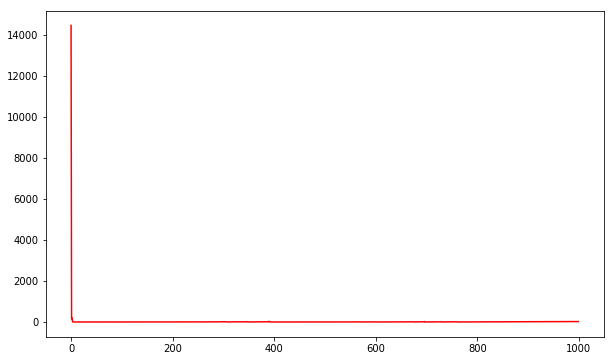

In [53]:
plt.subplots(figsize=(10, 6))
plt.plot(mse_history, 'r')
plt.show()

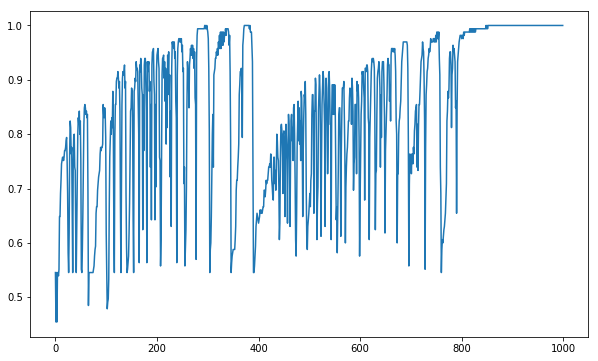

In [54]:
plt.subplots(figsize=(10, 6))
plt.plot(accuracy_history)
plt.show()

In [55]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("Test accuracy : ", (sess.run(accuracy, feed_dict = {x: test_x, y_:test_y})))

Test accuracy :  0.88095236


In [56]:
pred_y = sess.run(y, feed_dict = {x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))

print("MSE[Mean Squared Error]: %.4f" % (sess.run(mse)))

MSE[Mean Squared Error]: 21.3905
